In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Dropdown(description='Select Species:', options=('Pepper', 'Potato', 'Grape', 'Strawberry', 'Apple', 'Corn', '…

FileUpload(value={}, accept='image/*', description='Upload')

1/1 [==============================] - 0s 112ms/step


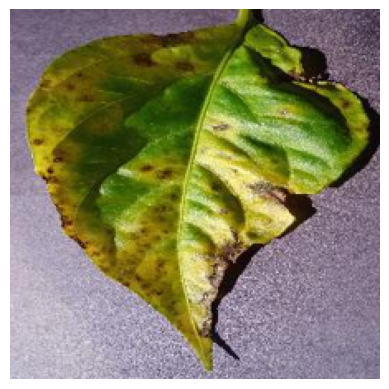

Species: Pepper, Predicted class: Bacterial Spot (Probability: 1.00)


1/1 [==============================] - 0s 119ms/step


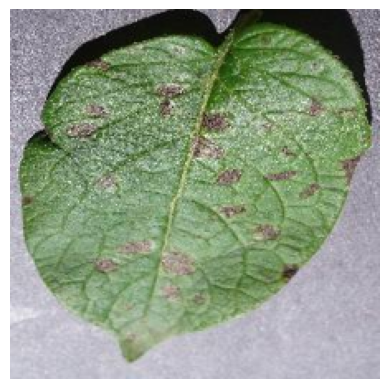

Species: Potato, Predicted class: Early Blight (Probability: 1.00)


1/1 [==============================] - 0s 120ms/step


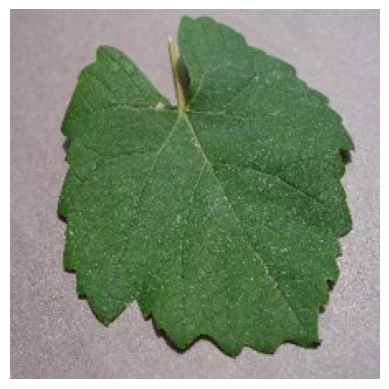

Species: Grape, Predicted class: Healthy (Probability: 1.00)
1/1 [==============================] - 0s 173ms/step


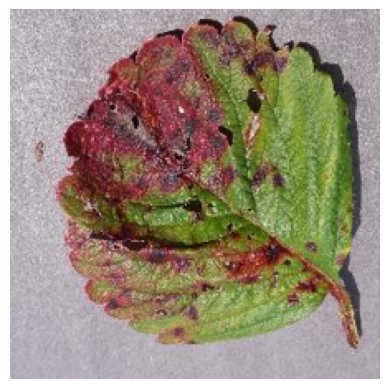

Species: Strawberry, Predicted class: Leaf Scorch (Probability: 1.00)
1/1 [==============================] - 0s 114ms/step


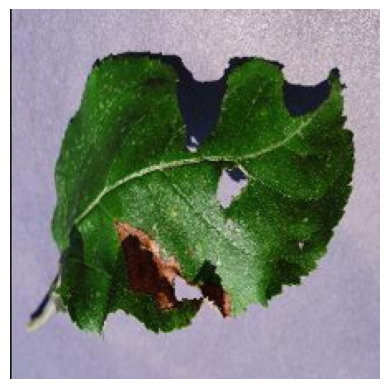

Species: Apple, Predicted class: Black Rot (Probability: 0.96)
1/1 [==============================] - 0s 114ms/step


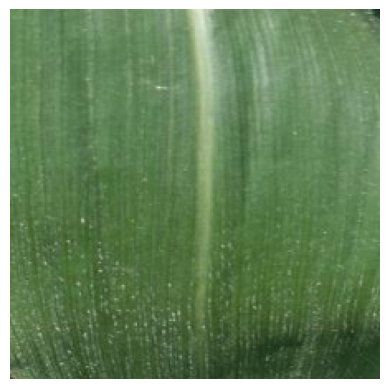

Species: Corn, Predicted class: Healthy (Probability: 0.95)
1/1 [==============================] - 0s 114ms/step


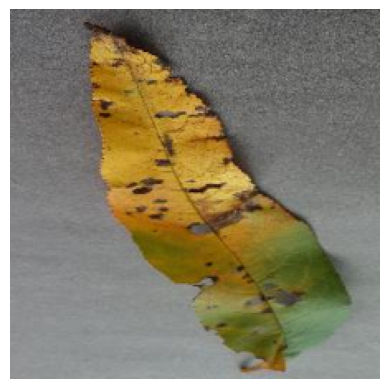

Species: Peach, Predicted class: Bacterial Spot (Probability: 1.00)
1/1 [==============================] - 0s 191ms/step


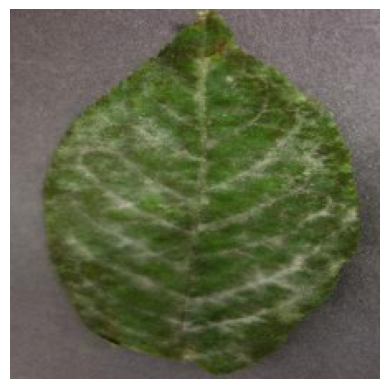

Species: Cherry, Predicted class: Powdery Mildrew (Probability: 1.00)


In [5]:
import ipywidgets as widgets
from IPython.display import display
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import io

# Load all models
models = {
    'Pepper': load_model('/content/gdrive/My Drive/GreenSight/pepper_model.h5'),
    'Potato': load_model('/content/gdrive/My Drive/GreenSight/potato_model.h5'),
    'Grape': load_model('/content/gdrive/My Drive/GreenSight/grape_model.h5'),
    'Strawberry': load_model('/content/gdrive/My Drive/GreenSight/strawberry_model.h5'),
    'Apple': load_model('/content/gdrive/My Drive/GreenSight/apple_model.h5'),
    'Corn': load_model('/content/gdrive/My Drive/GreenSight/corn_model.h5'),
    'Peach': load_model('/content/gdrive/My Drive/GreenSight/peach_model.h5'),
    'Cherry': load_model('/content/gdrive/My Drive/GreenSight/cherry_model.h5'),

# Load other species models similarly
}

# Define class names for each species
class_names = {
    'Pepper': ['Bacterial Spot', 'Healthy'],
    'Potato': ['Early Blight', 'Healthy', 'Late Blight'],
    'Grape': ['Black Rot', 'Esca', 'Healthy', 'Leaf Blight'],
    'Strawberry': ['Healthy', 'Leaf Scorch'],
    'Apple': ['Apple Scab', 'Black Rot','Cedar Apple Rust', 'Healthy'],
    'Corn': ['Cercospora Leaf Spot', 'Common Rust','Healthy','Northern Leaf Blight'],
    'Peach': ['Bacterial Spot', 'Healthy'],
    'Cherry': ['Healthy', 'Powdery Mildrew'],
}

# Prepare image for prediction
def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert("RGB")
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

# Prediction function
def predict(model, img_data, species):
    img = Image.open(io.BytesIO(img_data))
    img = img.resize((224, 224))
    img_array = prepare_image(img, target_size=(224, 224))
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    probability = np.max(prediction)
    species_class_names = class_names[species]
    class_prediction = species_class_names[predicted_class[0]]
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(f'Species: {species}, Predicted class: {class_prediction} (Probability: {probability:.2f})')

# Dropdown for species selection
species_dropdown = widgets.Dropdown(
    options=models.keys(),
    description='Select Species:',
    disabled=False,
)

# File upload handler
def on_file_upload(change):
    species = species_dropdown.value
    model = models[species]
    for uploaded_filename, uploaded_file in file_upload.value.items():
        img_data = uploaded_file['content']
        predict(model, img_data, species)

# Create a file upload widget
file_upload = widgets.FileUpload(accept='image/*', multiple=False)
file_upload.observe(on_file_upload, names='value')

# Display widgets
display(species_dropdown, file_upload)
